3.34668451378
AxesSubplot(0.125,0.125;0.775x0.755)


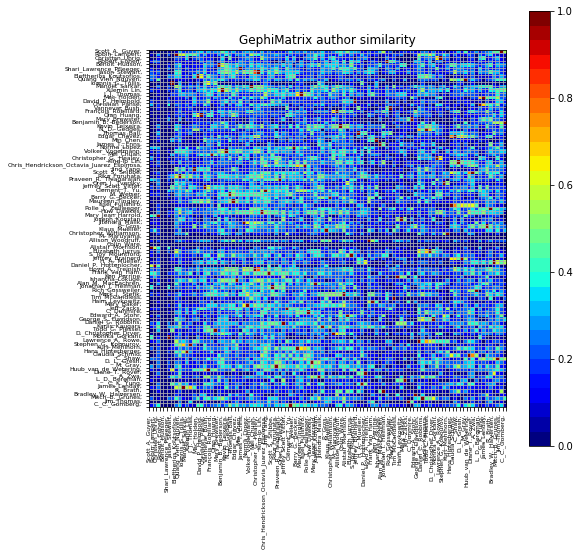

AxesSubplot(0.125,0.125;0.775x0.755)


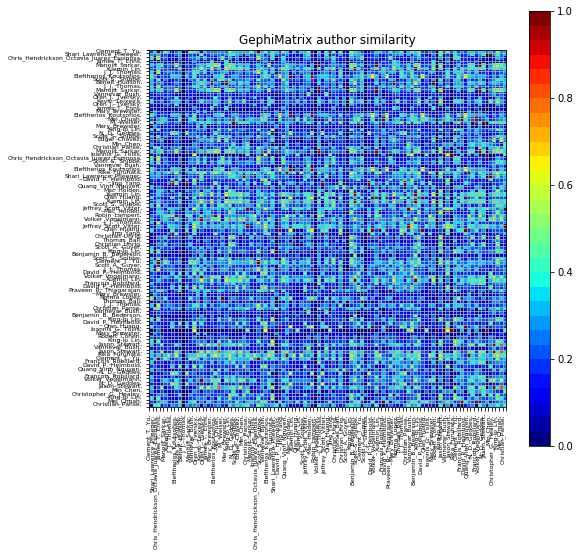

In [25]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as spc
%matplotlib inline

from pandas import DataFrame, read_csv
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def plotdf(df):
    # plots dataframe
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    print(ax1)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GephiMatrix author similarity')
    labels=[]
    for i in df:
        labels.append(i+',')
    
    ax1.xaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[0]+1))
    ax1.yaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[1]+1))
    ax1.set_xticklabels(labels,fontsize=6,rotation=90)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.8, -.6, -.4, -0.2, 0, .2,.4,.6,.8,1])
    plt.show()
    

# Read file into a Pandas dataframe
f = "C:/Users/s165698/.jupyter/GephiMatrix_author_similarity.csv" 
df = read_csv(f, sep=';', header = 0, index_col = False)
df = df.set_index("Unnamed: 0")
#print(df)
# Reduce problem size for test purposes
n=100
df = df.iloc[:n,:n]
#print(df)
#print(df.shape)

# Compute correlations
#corr = df.corr().values

# determine clusters
#dissimilarity = 1 - np.abs(corr)
#hierarchy = linkage(squareform(dissimilarity), method='average')
#dissimilarity = 1 - np.abs(corr)
pdist = spc.distance.pdist(df)
print(pdist.max())
#meth='single'
meth='complete'
#meth='average'
#meth='weighted'
#meth='centroid'
hierarchy = spc.linkage(pdist, method=meth)
#crit='inconsistent'
crit='distance'
#crit='maxclust'
index = spc.fcluster(hierarchy, 0.5*pdist.max(), criterion=crit)

columns = [df.columns.tolist()[i] for i in list(np.argsort(index))]
df = df.reindex_axis(columns, axis=1)

#print(labels)
#print(df.iloc[labels-1])

# plot sorted dataframe
plotdf(df)
plotdf(df.iloc[index-1, index-1])



In [18]:
import pandas as pd
import scipy.cluster.hierarchy as spc

corr = df.corr().values
print(corr)

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')




#corr = df.corrcoef(df, header = Null, index_col = 5)  # 20 by 20 correlation matrix
#corr = (corr + corr.T)/2                         # made symmetric
np.fill_diagonal(corr, 1)                        # put 1 on the diagonal


from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - np.abs(corr)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.5, criterion='distance')

[[ 1.          0.75903763  0.5781422  ..., -0.1539135  -0.01063799
  -0.10590154]
 [ 0.75903763  1.          0.60488771 ..., -0.1365248   0.00776425
  -0.0828636 ]
 [ 0.5781422   0.60488771  1.         ..., -0.09076752  0.20225498
  -0.19367115]
 ..., 
 [-0.1539135  -0.1365248  -0.09076752 ...,  1.          0.3762477
   0.27645332]
 [-0.01063799  0.00776425  0.20225498 ...,  0.3762477   1.         -0.01057665]
 [-0.10590154 -0.0828636  -0.19367115 ...,  0.27645332 -0.01057665  1.        ]]


ValueError: The condensed distance matrix must contain only finite values.

In [26]:
# Two pass clustering
# 1-We cluster the corr matrix
#   We sort the survey data according to this clustering
# 2-For cluster bigger than a threshold we cluster those sub-clusters
#   We sort the survey data according to these clustering

import scipy
import scipy.cluster.hierarchy as sch
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as spc
%matplotlib inline

from pandas import DataFrame, read_csv
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform


def plot_corr(df):
    # plots dataframe
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    print(ax1)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GephiMatrix author similarity')
    labels=[]
    for i in df:
        labels.append(i+',')
    
    ax1.xaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[0]+1))
    ax1.yaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[1]+1))
    ax1.set_xticklabels(labels,fontsize=6,rotation=90)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.8, -.6, -.4, -0.2, 0, .2,.4,.6,.8,1])
    plt.show()
    
# Read file into a Pandas dataframe
f = "C:/Users/s165698/.jupyter/GephiMatrix_author_similarity.csv" 
df = read_csv(f, sep=';', header = 0, index_col = False)
df = df.set_index("Unnamed: 0")
#print(df)

cluster_th = 4

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df = df.reindex_axis(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex_axis(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex_axis(columns, axis=1)

plot_corr(df)

ValueError: The condensed distance matrix must contain only finite values.

In [27]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as spc
%matplotlib inline

from pandas import DataFrame, read_csv
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def plotdf(df):
    # plots dataframe
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(111)
    print(ax1)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GephiMatrix author similarity')
    labels=[]
    for i in df:
        labels.append(i+',')
    
    ax1.xaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[0]+1))
    ax1.yaxis.set_major_locator(plt.LinearLocator(numticks=df.shape[1]+1))
    ax1.set_xticklabels(labels,fontsize=6,rotation=90)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1,-.8, -.6, -.4, -0.2, 0, .2,.4,.6,.8,1])
    plt.show()
    

# Read file into a Pandas dataframe
f = "C:/Users/s165698/.jupyter/GephiMatrix_author_similarity.csv" 
df = read_csv(f, sep=';', header = 0, index_col = False)
df = df.set_index("Unnamed: 0")
#print(df)
# Reduce problem size for test purposes
n=50
df = df.iloc[:n,:n]
#print(df)
#print(df.shape)

# Compute correlations
corr = df.corr().values

# determine clusters
#dissimilarity = 1 - np.abs(corr)
#hierarchy = linkage(squareform(dissimilarity), method='average')
#dissimilarity = 1 - np.abs(corr)
pdist = spc.distance.pdist(corr)
print(pdist.max())
#meth='single'
meth='complete'
#meth='average'
#meth='weighted'
#meth='centroid'
hierarchy = spc.linkage(pdist, method=meth)
#crit='inconsistent'
crit='distance'
#crit='maxclust'
index = spc.fcluster(hierarchy, 0.5*pdist.max(), criterion=crit)

columns = [df.columns.tolist()[i] for i in list(np.argsort(index))]
df = df.reindex_axis(columns, axis=1)

#print(labels)
#print(df.iloc[labels-1])


cluster_th = 4

unique, counts = np.unique(index, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(index)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:
        corr = df.corr().values
        pdist = spc.distance.pdist(corr)
        hierarchy = spc.linkage(pdist, method=meth)
        index = spc.fcluster(hierarchy, 0.5*pdist.max(), criterion=crit)
        col = [sub.columns.tolist()[i] for i in list(np.argsort(index))]
        sub = sub.reindex_axis(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex_axis(columns, axis=1)


# plot sorted dataframe
plotdf(df)
#plot_corr(df.iloc[index-1, index-1])


3.59884602616


IndexError: list index out of range